#  GTA News 50 Clusters Chart

## Set presentation parameters

In [1]:
img_pix_x = 1600
img_pix_y = 1200

## Load 50 cluster dataframe

In [2]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
from collections import Counter

# directories
dir_path = os.getcwd()
#print('Working dir: ' + dir_path)

local_path = dir_path + '\\..\\gta-news\\doc2vec\data\\'
df = pd.read_pickle(local_path+'backup'+'-gta.50'+'.pickle')

In [3]:
df.head()

,date,title,url,cluster,vector
0,2019-04-20,"""this is why we can't have nice things in nyc,...",http://dagblog.com/reader-blogs/why-we-cant-ha...,13,"[-0.47769657, 0.3672163, 0.23536347, 0.5756423..."
1,2019-04-20,rural book borrowing in peril as libraries sla...,http://easternontarionetwork.com/2019/04/20/ru...,13,"[-0.5722261, -0.26479113, -0.1152498, 0.664171..."
2,2019-04-20,"""discussing canada's new us-focused cannabis e...",http://www.benzinga.com/markets/cannabis/19/04...,11,"[0.54588157, -0.26139393, -0.18809983, -0.0384..."
3,2019-04-20,serea restaurant slated to open in hotel del c...,http://www.coronadonewsca.com/news/coronado_ho...,25,"[-0.28711024, -0.2106441, -0.61289483, 0.04533..."
4,2019-04-20,federal trial of vernon man accused of abducti...,http://www.courant.com/news/connecticut/hc-new...,46,"[0.062113207, 0.0157832, 0.23044105, 0.4720517..."


## Get cluster descriptions from titles

In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('../gta-news/doc2vec'))
if module_path not in sys.path:
    sys.path.append(module_path)

import d2v_utils
skip_terms =['toronto','canada','canadian','ontario']
cluster_descr = []
clusters = df.groupby(['cluster'])['title']
for cluster, titles in clusters:
    #print("\nCluster: ", cluster)
    filtered_words = []
    for title in titles:
        t = title[0:-4]
        #print(">>>", t)
        tokens = d2v_utils.prepare_text_for_lda(t)
        tokens = [word for word in tokens if word not in skip_terms and not word.isdigit()]
        #print("  >", tokens)
        filtered_words = filtered_words + tokens
    count = Counter(filtered_words)
    current_clust_descr = count.most_common()[:10] 
    cluster_descr.append(current_clust_descr)

clust_num = len(cluster_descr)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ibaranov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ibaranov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
print(cluster_descr[0][0:5])
print(cluster_descr[1][0:5])
print(cluster_descr[2][0:5])
print(cluster_descr[3][0:5])
print(cluster_descr[4][0:5])
print(cluster_descr[5][0:5])

[('announce', 195), ('result', 47), ('cannabis', 44), ('project', 43), ('update', 43)]
[('refugee', 54), ('asylum', 47), ('snowden', 46), ('shelter', 45), ('grant', 30)]
[('weather', 22), ('winter', 21), ('storm', 16), ('school', 11), ('sweep', 9)]
[('cannabis', 69), ('store', 26), ('legal', 17), ('medical', 14), ('illegal', 14)]
[('woman', 21), ('survivor', 18), ('family', 16), ('years', 13), ('holocaust', 13)]
[('research', 19), ('university', 18), ('innovation', 14), ('better', 13), ('company', 13)]


## TODO: Project clustering to 2D using PCA

In [6]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'])

## Create clusters X,Y randomly

In [7]:
dfAggr = df[['date','cluster']].groupby(['date','cluster'])\
    .first().sort_values(['date','cluster']).reset_index()

dfCount = df.groupby(['date','cluster'])['cluster']\
    .agg('count').to_frame('count')\
    .sort_values(['date','cluster']).reset_index()['count']

dfAggr['count'] = dfCount

# temporary RANDOM
import random
import numpy as np
random.seed(11)
dfAggr['x'] = 0.0
dfAggr['y'] = 0.0
sampl_x = np.random.uniform(low=0.0, high=1.0, size=(clust_num,))
sampl_y = np.random.uniform(low=0.0, high=1.0, size=(clust_num,))
for i, row in dfAggr.iterrows():
    dfAggr.at[i,'x'] = sampl_x[row.cluster]
    dfAggr.at[i,'y'] = sampl_y[row.cluster]

dfAggr.head()

,date,cluster,count,x,y
0,2019-01-21,0,8,0.515229,0.113290
1,2019-01-21,1,2,0.213407,0.675901
2,2019-01-21,2,3,0.103257,0.108141
3,2019-01-21,3,2,0.674396,0.802059
4,2019-01-21,4,1,0.142574,0.474956


## Add day column

In [8]:
dfChart = dfAggr[['date','cluster','count','x','y']].sort_values(['date','count'], ascending=[True,True])
#dfChart = dfChart[dfChart['count'] > 2]

#add 'day' column
new_year_day = pd.Timestamp(year=2019, month=1, day=1)
dfChart['day'] = 0
for i, row in dfChart.iterrows():
    dfChart.at[i,'day'] = (row['date'] - new_year_day).days + 1


dfChart.head()

,date,cluster,count,x,y,day
4,2019-01-21,4,1,0.142574,0.474956,21
14,2019-01-21,16,1,0.892200,0.902983,21
15,2019-01-21,17,1,0.428275,0.405068,21
17,2019-01-21,19,1,0.340101,0.752801,21
20,2019-01-21,22,1,0.100062,0.786072,21


## Plot

In [9]:
# defines wordcloud circular mask positioned on image
def create_circular_mask(w, h, center=None, radius=None):
    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])
    y, x = np.ogrid[:h, :w]
    mask = (y - center[1]) ** 2 + (x - center[0]) ** 2 > radius ** 2
    mask = 255 * mask.astype(int)
    return mask

In [10]:
import random
random.seed(13)
 
def get_colors(n):
  ret = []
  for i in range(n):
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    ret.append((r,g,b)) 
  return ret

colors = get_colors(clust_num)

print(colors[0])
print(colors[1])
print(colors[2])
print(colors[30])

(66, 175, 175)
(217, 47, 59)
(37, 57, 187)
(42, 175, 28)


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy
import numpy.ma as ma
#from PIL import Image

radius_scale = 10
x_scale = 1.0 * img_pix_x
y_scale = 1.0 * img_pix_y

img_pix_x = 1600
img_pix_y = 1200

# group by days
grouped = dfChart.groupby(['date'])
for date, group in grouped:
    date_str = date.strftime('%Y-%m-%d')
    print (date_str)
    
    # generate combined image of one day
    first = True
    for row_index, row in group.iterrows():

        # skip clusters with low count
        if row['count'] > 1:
            print ("...cl: {0}, x: {1}, y: {2}, count: {3}".format(row.cluster, row.x, row.y, row['count']))
        else:
            print ("...cl: {0}, skipping due to low count...".format(row.cluster))
            continue
        
        # masked wordcloud on a big canvas
        mask = create_circular_mask(img_pix_x, img_pix_y, 
                                    [int(x_scale * float(row.x)), int(y_scale * float(row.y))],
                                    int(radius_scale * float(row['count'])))
        
        try:
            wc = WordCloud(background_color="white", random_state=33, 
                           mask=mask,
                           color_func=lambda *args, **kwargs: colors[row.cluster])

            wc.generate_from_frequencies(dict(cluster_descr[row.cluster]))

            # first step - just create a background image
            if first:
                print ("...creating background")
                background = wc.to_image()
                first = False
                continue

            # make white pix transparent
            img = wc.to_image().convert('RGBA')
            datas = img.getdata()
            newData = []
            for item in datas:
                if item[0] == 255 and item[1] == 255 and item[2] == 255:
                    newData.append((255, 255, 255, 0))
                else:
                    newData.append(item)
            img.putdata(newData)

            # combine images
            background.paste(img, (0, 0), img)
        
        except:
            #print ("...cl: {0}, x: {1}, y: {2}, count: {3}".format(row.cluster, row.x, row.y, row['count']))
            print("Oops!",sys.exc_info()[0],"occured.")
        
    # save one day combine image
    background.save("wc/wc.{0}.png".format(date_str), "PNG")

## Preview the resulting video

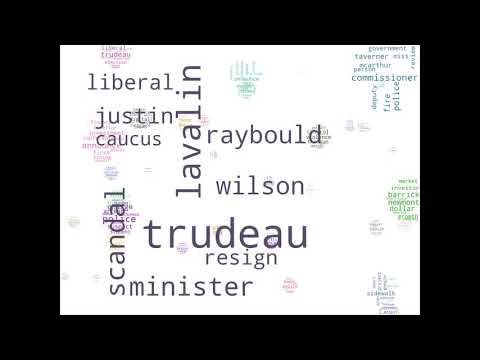

In [13]:
#https://youtu.be/IaGcme4d6ho
from IPython.display import YouTubeVideo
YouTubeVideo('IaGcme4d6ho')